In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime 
from sklearn.model_selection import train_test_split

# Import the autocorrelation function (ACF) plot.
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

# We are required to do this in order to avoid "FutureWarning" issues.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#from skopt import BayesSearchCV
#from skopt.space import Real, Categorical, Integer
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from tensorflow.keras.layers import LSTM

from tensorflow.keras.layers import Dense, Dropout, GRU
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

from sklearn.svm import SVC

from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import RandomForestClassifier

# Import Bagging Classifier.
from sklearn.ensemble import BaggingClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

Saving clean_daily_oc.csv to clean_daily_oc.csv


In [3]:
# import data
data = pd.read_csv('clean_daily_oc.csv')

In [4]:
data.shape

(3651, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3651 entries, 0 to 3650
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            3651 non-null   object 
 1   day_of_week_1   3651 non-null   int64  
 2   day_of_week_2   3651 non-null   int64  
 3   day_of_week_3   3651 non-null   int64  
 4   day_of_week_4   3651 non-null   int64  
 5   day_of_week_5   3651 non-null   int64  
 6   day_of_week_6   3651 non-null   int64  
 7   is_holiday_1    3651 non-null   int64  
 8   Open_pct        3651 non-null   float64
 9   Close_pct       3651 non-null   float64
 10  Volume_diff     3651 non-null   float64
 11  Open_pct_l1     3651 non-null   float64
 12  Close_pct_l1    3651 non-null   float64
 13  Volume_diff_l1  3651 non-null   float64
 14  direction       3651 non-null   object 
dtypes: float64(6), int64(7), object(2)
memory usage: 428.0+ KB


#Preprocessing 

need to run dates from here 

In [6]:
data.columns

Index(['date', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
       'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'is_holiday_1',
       'Open_pct', 'Close_pct', 'Volume_diff', 'Open_pct_l1', 'Close_pct_l1',
       'Volume_diff_l1', 'direction'],
      dtype='object')

In [7]:
# drop text column 
#data.drop(columns='text',inplace=True)


In [5]:
# check if date is datetime object 
type(data.loc[0,'date'])

str

In [6]:
# check format of date 
data['date'][0]

'2011-07-31'

In [7]:
# convert str to date time 
datetime.datetime.strptime('2011-07-29','%Y-%m-%d').date()

datetime.date(2011, 7, 29)

In [8]:
# convert all dates to datetime objects 
data['date']= data['date'].apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d').date() )

In [9]:
# confirm results
type(data.loc[0,'date'])

datetime.date

In [10]:
# make date index 
data.set_index('date',inplace=True)

In [11]:
#confirm results
data.index

Index([2011-07-31, 2011-08-01, 2011-08-02, 2011-08-03, 2011-08-04, 2011-08-05,
       2011-08-06, 2011-08-07, 2011-08-08, 2011-08-09,
       ...
       2021-08-08, 2021-08-09, 2021-08-10, 2021-08-11, 2021-08-12, 2021-08-13,
       2021-08-14, 2021-08-15, 2021-08-16, 2021-08-17],
      dtype='object', name='date', length=3651)

In [12]:
# look at data types and check for nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3651 entries, 2011-07-31 to 2021-08-17
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   day_of_week_1   3651 non-null   int64  
 1   day_of_week_2   3651 non-null   int64  
 2   day_of_week_3   3651 non-null   int64  
 3   day_of_week_4   3651 non-null   int64  
 4   day_of_week_5   3651 non-null   int64  
 5   day_of_week_6   3651 non-null   int64  
 6   is_holiday_1    3651 non-null   int64  
 7   Open_pct        3651 non-null   float64
 8   Close_pct       3651 non-null   float64
 9   Volume_diff     3651 non-null   float64
 10  Open_pct_l1     3651 non-null   float64
 11  Close_pct_l1    3651 non-null   float64
 12  Volume_diff_l1  3651 non-null   float64
 13  direction       3651 non-null   object 
dtypes: float64(6), int64(7), object(1)
memory usage: 427.9+ KB


- No nulls 

- day_of_week and is_holiday should be dummified 


In [16]:
# dummify day_of_week and is_holiday
#data= pd.get_dummies(data,columns=['day_of_week','is_holiday'],drop_first=True)

In [17]:
# check results
#data.columns

In [18]:
# look at open,close, and volume columns 
#data[['Open','Close','Volume']].head()

- Change from actual value to change to percent change from the day before 

In [19]:
# change from values to percent change from previous day 
#data['Open_pct']= data['Open'].pct_change()
#data['Close_pct']= data['Close'].pct_change()
#data['Volume_diff']= data['Volume'].diff()

In [20]:
# check results 
#ata[['Open_pct','Close_pct','Volume_diff']]

In [21]:
# check how many nulls introduced 
#data.isnull().sum()

In [22]:
# drop first row 
#data= data[1:]

In [23]:
# confirm results
#data.info()

- Remove Open, Close, and Volume 

In [24]:
#data.drop(columns=['Open','Close','Volume'],inplace=True)

In [25]:
# confirm results
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3651 entries, 2011-07-31 to 2021-08-17
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   day_of_week_1   3651 non-null   int64  
 1   day_of_week_2   3651 non-null   int64  
 2   day_of_week_3   3651 non-null   int64  
 3   day_of_week_4   3651 non-null   int64  
 4   day_of_week_5   3651 non-null   int64  
 5   day_of_week_6   3651 non-null   int64  
 6   is_holiday_1    3651 non-null   int64  
 7   Open_pct        3651 non-null   float64
 8   Close_pct       3651 non-null   float64
 9   Volume_diff     3651 non-null   float64
 10  Open_pct_l1     3651 non-null   float64
 11  Close_pct_l1    3651 non-null   float64
 12  Volume_diff_l1  3651 non-null   float64
 13  direction       3651 non-null   object 
dtypes: float64(6), int64(7), object(1)
memory usage: 427.9+ KB


- Trying to predict Open_pct 

- Cannot use open_pct, Close_pct, and Volume_diff for the day being predicted because those will not be known in advance as we trying to predict how the market will change from closing the day before. 

- We will know the price from yesterday so we can add a lag for that. 

In [26]:
# add columns for previous days price info 
#data['Open_pct_l1']=data['Open_pct'].shift(1)
#data['Close_pct_l1']=data['Close_pct'].shift(1)
#data['Volume_diff_l1']=data['Volume_diff'].shift(1)

In [27]:
# drop first row since added lag 
#data= data[1:]

In [28]:
# make sure no nulls left 
#data.isnull().sum()

For classification add column for price going up,down, or same 

In [29]:
#def get_direction(value):
#    if value>0: return 'up'
#    elif value<0: return 'down'
#    else: return 'same'

In [30]:
#data['direction']=data['Open_pct'].apply(get_direction)

In [31]:
#data['direction'].value_counts(normalize=True)

Market has been going up so makes sense

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3651 entries, 2011-07-31 to 2021-08-17
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   day_of_week_1   3651 non-null   int64  
 1   day_of_week_2   3651 non-null   int64  
 2   day_of_week_3   3651 non-null   int64  
 3   day_of_week_4   3651 non-null   int64  
 4   day_of_week_5   3651 non-null   int64  
 5   day_of_week_6   3651 non-null   int64  
 6   is_holiday_1    3651 non-null   int64  
 7   Open_pct        3651 non-null   float64
 8   Close_pct       3651 non-null   float64
 9   Volume_diff     3651 non-null   float64
 10  Open_pct_l1     3651 non-null   float64
 11  Close_pct_l1    3651 non-null   float64
 12  Volume_diff_l1  3651 non-null   float64
 13  direction       3651 non-null   object 
dtypes: float64(6), int64(7), object(1)
memory usage: 427.9+ KB


# Classification models 

In [13]:
# define X and y 
X= data.drop(columns=['Open_pct','Close_pct','Volume_diff','direction'])
y=data['direction']

In [14]:
# train test split 
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,
                                               shuffle=False)

## Logistic Regression 

In [15]:
logreg = LogisticRegression(penalty='none',random_state=42,)

# fit model 
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
# get accuracy scores 
accuracy_score(y_train,logreg.predict(X_train))

0.43938356164383563

In [17]:
accuracy_score(y_test,logreg.predict(X_test))

0.43912448700410395

In [18]:
# for use with get_acc function 
# defines train/test split X and y for getting accuracy
vars_list1 = [X_train,X_test,y_train,y_test]

In [19]:
# helper function to get accuracy for model
def get_acc(model,vars_list):
    'given fitted model and [X_train,X_test,y_train,y_test] returns test and train accuracy'
    print(f'Train Accuracy: {accuracy_score(vars_list[2],model.predict(vars_list[0]))}')
    print(f'Test Accuracy: {accuracy_score(vars_list[3],model.predict(vars_list[1]))}')
    return

In [20]:
get_acc(logreg,vars_list1)

Train Accuracy: 0.43938356164383563
Test Accuracy: 0.43912448700410395


## KNN  

In [21]:
# scale data for KNN model 
ss= StandardScaler()

Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

# make vars list for metrics later 
vars_list_ss = [Xs_train,Xs_test,y_train,y_test]

In [22]:
# define params for gridsearch 
knn_params= {
    'n_neighbors':[3,5,7,9],
    'weights':['uniform','distance'],
    'p':[1,2]
}


In [23]:
# instantiate knn_gs 
knn_gs = GridSearchCV(KNeighborsClassifier(n_jobs=-1),knn_params,n_jobs=-1,cv=3,verbose=2)

In [24]:
# fit knn_gs
knn_gs.fit(Xs_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    5.1s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=-1,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [25]:
knn_gs.best_params_

{'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}

In [26]:
pd.DataFrame(knn_gs.cv_results_).columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_neighbors', 'param_p', 'param_weights', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')

In [27]:
pd.DataFrame(knn_gs.cv_results_)[['param_n_neighbors', 'param_p', 'param_weights','mean_test_score']]

,param_n_neighbors,param_p,param_weights,mean_test_score
0,3,1,uniform,0.801021
1,3,1,distance,0.797254
2,3,2,uniform,0.796226
3,3,2,distance,0.793145
4,5,1,uniform,0.803073
5,5,1,distance,0.797592
6,5,2,uniform,0.801018
7,5,2,distance,0.798278
8,7,1,uniform,0.799989
9,7,1,distance,0.796907


In [28]:
get_acc(knn_gs,vars_list_ss)

Train Accuracy: 0.8359589041095891
Test Accuracy: 0.771545827633379


## Decision Tree 

In [29]:
# Instantiate model with random_state = 42.
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(Xs_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [30]:
get_acc(dt,vars_list_ss)

Train Accuracy: 0.927054794520548
Test Accuracy: 0.7838577291381669


## Bagging Classifier 

In [31]:
# Instantiate and fit model 
bag = BaggingClassifier(random_state=42).fit(Xs_train,y_train)

In [32]:
# get metrics 
get_acc(bag,vars_list_ss)

Train Accuracy: 0.9167808219178082
Test Accuracy: 0.79890560875513


## Random Forest 

In [33]:
# instantiate and fit model 
randfor = RandomForestClassifier(random_state=42,).fit(Xs_train,y_train)

In [34]:
# check metrics 
get_acc(randfor,vars_list_ss)

Train Accuracy: 0.927054794520548
Test Accuracy: 0.8071135430916553


## Gradient Boosting 

In [35]:
# instantiate and fit gradient boosting model 
gradboost= GradientBoostingClassifier(random_state=42,).fit(Xs_train,y_train)

In [36]:
get_acc(gradboost,vars_list_ss)

Train Accuracy: 0.861986301369863
Test Accuracy: 0.8002735978112175


Tune Hyperparamters 

In [39]:
from scipy.stats import randint,uniform

In [40]:
# params to search 
params_grad_boost1= {
    'loss':['deviance', 'exponential'],
    #'learning_rate':randint(0.001,0.4),
    'n_estimators' : randint(100,500),
    'min_samples_split':randint(2,10),
    'min_samples_leaf':randint(1,10),
}

gb1_rs1 = RandomizedSearchCV(GradientBoostingClassifier(random_state=42,),params_grad_boost1,n_iter=10,random_state=42,verbose=1,cv=3)

gb1_rs1.fit(Xs_train,y_train)

NameError: ignored

In [ ]:
gs_results(gb1_rs1)

In [ ]:
get_acc(gb1_rs1,vars_list_ss)

In [ ]:
# params to search 
params_grad_boost2= {
    'loss':['deviance',],
    'learning_rate':uniform(0.001,0.4),
    'n_estimators' : randint(100,500),
    'min_samples_split':randint(3,30),
    'min_samples_leaf':randint(3,30),
}

gb1_rs2 = RandomizedSearchCV(GradientBoostingClassifier(random_state=42,),params_grad_boost2,n_iter=35,random_state=42,verbose=1,cv=3)

gb1_rs2.fit(Xs_train,y_train)

In [ ]:
get_acc(gb1_rs2,vars_list_ss)

In [ ]:
gs_results(gb1_rs2)

## XGBClassifier 

In [ ]:
# instantiate and fit model 
xgb_class = XGBClassifier().fit(Xs_train,y_train)

In [ ]:
get_acc(xgb_class,vars_list_ss)

## SVM 

In [ ]:
# instantiate and fit model 
svc = SVC(random_state=42,).fit(Xs_train,y_train)

In [ ]:
get_acc(svc,vars_list_ss)

## Feed Forward Neural Network 


In [41]:
# helper function to plot train and val accuracy 
def plot_acc(hist):
    plt.plot(hist.history['acc'], label='Train accuracy')
    plt.plot(hist.history['val_acc'], label='Test accuracy')
    plt.legend();

In [42]:
# check how many columns in X_train 
X_train.shape

(2920, 10)

In [43]:
# helper function 
def num_direction(value):
    if value=='up': return 1
    elif value=='down': return -1
    else: return 0


In [44]:
y_train.value_counts()

up      1345
down    1080
same     495
Name: direction, dtype: int64

In [45]:
# test if it works 
y_train.apply(num_direction)

date
2011-07-31    0
2011-08-01    1
2011-08-02   -1
2011-08-03   -1
2011-08-04    1
             ..
2019-08-03   -1
2019-08-04    0
2019-08-05   -1
2019-08-06   -1
2019-08-07   -1
Name: direction, Length: 2920, dtype: int64

In [46]:
# make y categorical for use with neural networks 
y_train_nn = to_categorical(y_train.apply(num_direction),3)
y_test_nn = to_categorical(y_test.apply(num_direction),3)

In [47]:
# for metrics later 
vars_nn = [Xs_train,Xs_test,y_train_nn,y_test_nn]

In [48]:
# model network 
fnn = Sequential()
fnn.add(Dense(128,activation="relu", input_shape=(10,)))
fnn.add(Dense(64, activation="relu"))
fnn.add(Dense(3, activation="softmax"))

# compile model 
fnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

# check model 
fnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 9,859
Trainable params: 9,859
Non-trainable params: 0
_________________________________________________________________


In [49]:
pd.DataFrame(y_test_nn).isnull().sum()

0    0
1    0
2    0
dtype: int64

In [50]:
validation_data=(Xs_test,y_test_nn)

In [52]:
hist_fnn = fnn.fit(Xs_train,y_train_nn,batch_size=72,epochs=100,
                   validation_data=(Xs_test,y_test_nn),shuffle=False,)

Epoch 1/100
41/41 [==============================] - 3s 10ms/step - loss: 0.7613 - acc: 0.6856 - val_loss: 0.5103 - val_acc: 0.7743
Epoch 2/100
41/41 [==============================] - 0s 4ms/step - loss: 0.4555 - acc: 0.8038 - val_loss: 0.4754 - val_acc: 0.7921
Epoch 3/100
41/41 [==============================] - 0s 5ms/step - loss: 0.4013 - acc: 0.8130 - val_loss: 0.4979 - val_acc: 0.7893
Epoch 4/100
41/41 [==============================] - 0s 4ms/step - loss: 0.3842 - acc: 0.8185 - val_loss: 0.5132 - val_acc: 0.7880
Epoch 5/100
41/41 [==============================] - 0s 4ms/step - loss: 0.3758 - acc: 0.8219 - val_loss: 0.5202 - val_acc: 0.7907
Epoch 6/100
41/41 [==============================] - 0s 5ms/step - loss: 0.3705 - acc: 0.8236 - val_loss: 0.5229 - val_acc: 0.7893
Epoch 7/100
41/41 [==============================] - 0s 4ms/step - loss: 0.3666 - acc: 0.8236 - val_loss: 0.5237 - val_acc: 0.7907
Epoch 8/100
41/41 [==============================] - 0s 5ms/step - loss: 0.3633 - 

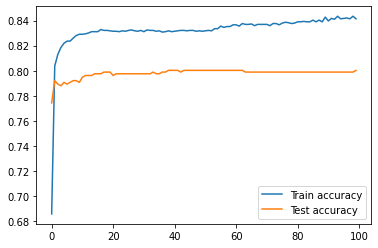

In [67]:
plot_acc(hist_fnn)

In [54]:
# check results
#get_acc(fnn,vars_nn)

## RNN 

In [55]:
# Create training sequences
train_sequences = TimeseriesGenerator(Xs_train, y_train_nn, length=1,batch_size=64)

# Create Test Sequences
test_sequences = TimeseriesGenerator(Xs_test, y_test_nn, length=1,batch_size=64)

In [56]:
train_sequences[0][0].shape


(64, 1, 10)

In [57]:
len(test_sequences[0])


2

In [58]:
input_shape = train_sequences[0][0][0].shape

### rnn

In [60]:
# model network 

rnn = Sequential()
rnn.add(GRU(8,input_shape=input_shape, return_sequences=True))
rnn.add(GRU(8,return_sequences=False)) # false if next layer dense
rnn.add(Dense(10,activation='relu'))
rnn.add(Dense(3,activation='softmax'))

# compile model 
rnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

# show summary 
rnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 1, 8)              480       
_________________________________________________________________
gru_3 (GRU)                  (None, 8)                 432       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 33        
Total params: 1,035
Trainable params: 1,035
Non-trainable params: 0
_________________________________________________________________


In [61]:
hist_rnn = rnn.fit(train_sequences,validation_data=test_sequences,
                  epochs=50,verbose=2)

Epoch 1/50
46/46 - 7s - loss: 1.0888 - acc: 0.3926 - val_loss: 1.0559 - val_acc: 0.4932
Epoch 2/50
46/46 - 0s - loss: 1.0352 - acc: 0.4597 - val_loss: 0.9924 - val_acc: 0.5068
Epoch 3/50
46/46 - 0s - loss: 0.9638 - acc: 0.4601 - val_loss: 0.9063 - val_acc: 0.5110
Epoch 4/50
46/46 - 0s - loss: 0.8819 - acc: 0.4604 - val_loss: 0.8275 - val_acc: 0.5110
Epoch 5/50
46/46 - 0s - loss: 0.8136 - acc: 0.5389 - val_loss: 0.7642 - val_acc: 0.6329
Epoch 6/50
46/46 - 0s - loss: 0.7540 - acc: 0.6005 - val_loss: 0.7145 - val_acc: 0.6301
Epoch 7/50
46/46 - 0s - loss: 0.7094 - acc: 0.5988 - val_loss: 0.6802 - val_acc: 0.6274
Epoch 8/50
46/46 - 0s - loss: 0.6837 - acc: 0.5995 - val_loss: 0.6637 - val_acc: 0.6274
Epoch 9/50
46/46 - 0s - loss: 0.6717 - acc: 0.6009 - val_loss: 0.6578 - val_acc: 0.6370
Epoch 10/50
46/46 - 0s - loss: 0.6644 - acc: 0.6050 - val_loss: 0.6484 - val_acc: 0.6370
Epoch 11/50
46/46 - 0s - loss: 0.6602 - acc: 0.6023 - val_loss: 0.6443 - val_acc: 0.6438
Epoch 12/50
46/46 - 0s - loss:

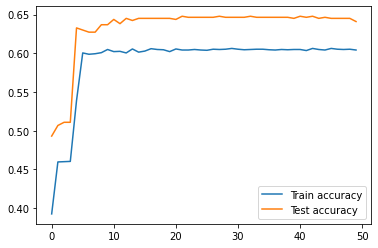

In [62]:
plot_acc(hist_rnn)

### rnn2

In [65]:
# model network 

rnn2 = Sequential()
rnn2.add(GRU(80,input_shape=input_shape, return_sequences=True))
rnn2.add(GRU(80,return_sequences=False)) # false if next layer dense
rnn2.add(Dense(10,activation='relu'))
rnn2.add(Dense(3,activation='softmax'))

# compile model 
rnn2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

# show summary 
rnn2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_6 (GRU)                  (None, 1, 80)             22080     
_________________________________________________________________
gru_7 (GRU)                  (None, 80)                38880     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                810       
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 33        
Total params: 61,803
Trainable params: 61,803
Non-trainable params: 0
_________________________________________________________________


In [66]:
hist_rnn2 = rnn2.fit(train_sequences,validation_data=test_sequences,
                  epochs=500,verbose=2)

Epoch 1/500
46/46 - 5s - loss: 0.9312 - acc: 0.5841 - val_loss: 0.7722 - val_acc: 0.6425
Epoch 2/500
46/46 - 0s - loss: 0.7282 - acc: 0.5988 - val_loss: 0.6830 - val_acc: 0.6397
Epoch 3/500
46/46 - 0s - loss: 0.6719 - acc: 0.5988 - val_loss: 0.6604 - val_acc: 0.6438
Epoch 4/500
46/46 - 0s - loss: 0.6584 - acc: 0.6005 - val_loss: 0.6553 - val_acc: 0.6452
Epoch 5/500
46/46 - 0s - loss: 0.6531 - acc: 0.6012 - val_loss: 0.6488 - val_acc: 0.6438
Epoch 6/500
46/46 - 0s - loss: 0.6520 - acc: 0.6023 - val_loss: 0.6463 - val_acc: 0.6438
Epoch 7/500
46/46 - 0s - loss: 0.6511 - acc: 0.6009 - val_loss: 0.6443 - val_acc: 0.6452
Epoch 8/500
46/46 - 0s - loss: 0.6487 - acc: 0.6023 - val_loss: 0.6450 - val_acc: 0.6452
Epoch 9/500
46/46 - 0s - loss: 0.6479 - acc: 0.6047 - val_loss: 0.6455 - val_acc: 0.6452
Epoch 10/500
46/46 - 0s - loss: 0.6463 - acc: 0.6040 - val_loss: 0.6427 - val_acc: 0.6397
Epoch 11/500
46/46 - 0s - loss: 0.6453 - acc: 0.6060 - val_loss: 0.6379 - val_acc: 0.6479
Epoch 12/500
46/46 

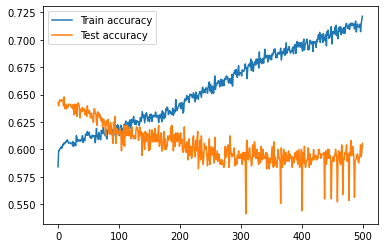

In [68]:
plot_acc(hist_rnn2)

### rnn3 <--rnn

adding another GRU+dense layer to rnn 

In [69]:
# model network 

rnn3 = Sequential()

rnn3.add(GRU(8,input_shape=input_shape, return_sequences=True))
rnn3.add(GRU(8,return_sequences=True))
rnn3.add(GRU(8,return_sequences=False)) # false if next layer dense

rnn3.add(Dense(10,activation='relu'))
rnn3.add(Dense(10,activation='relu'))

rnn3.add(Dense(3,activation='softmax'))

# compile model 
rnn3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

# show summary 
rnn3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_8 (GRU)                  (None, 1, 8)              480       
_________________________________________________________________
gru_9 (GRU)                  (None, 1, 8)              432       
_________________________________________________________________
gru_10 (GRU)                 (None, 8)                 432       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_12 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_13 (Dense)             (None, 3)                 33        
Total params: 1,577
Trainable params: 1,577
Non-trainable params: 0
____________________________________________________

In [70]:
hist_rnn3 = rnn3.fit(train_sequences,validation_data=test_sequences,
                  epochs=100,verbose=2)

Epoch 1/100
46/46 - 7s - loss: 1.0303 - acc: 0.5766 - val_loss: 0.9411 - val_acc: 0.6301
Epoch 2/100
46/46 - 0s - loss: 0.8854 - acc: 0.5930 - val_loss: 0.7862 - val_acc: 0.6370
Epoch 3/100
46/46 - 0s - loss: 0.7671 - acc: 0.5961 - val_loss: 0.7079 - val_acc: 0.6370
Epoch 4/100
46/46 - 0s - loss: 0.7109 - acc: 0.5961 - val_loss: 0.6709 - val_acc: 0.6384
Epoch 5/100
46/46 - 0s - loss: 0.6762 - acc: 0.5944 - val_loss: 0.6519 - val_acc: 0.6315
Epoch 6/100
46/46 - 0s - loss: 0.6606 - acc: 0.6050 - val_loss: 0.6461 - val_acc: 0.6411
Epoch 7/100
46/46 - 0s - loss: 0.6566 - acc: 0.6043 - val_loss: 0.6408 - val_acc: 0.6370
Epoch 8/100
46/46 - 0s - loss: 0.6534 - acc: 0.6088 - val_loss: 0.6381 - val_acc: 0.6370
Epoch 9/100
46/46 - 0s - loss: 0.6507 - acc: 0.6060 - val_loss: 0.6436 - val_acc: 0.6384
Epoch 10/100
46/46 - 0s - loss: 0.6521 - acc: 0.6060 - val_loss: 0.6453 - val_acc: 0.6370
Epoch 11/100
46/46 - 0s - loss: 0.6496 - acc: 0.6047 - val_loss: 0.6452 - val_acc: 0.6397
Epoch 12/100
46/46 

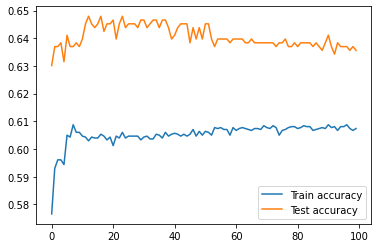

In [71]:
plot_acc(hist_rnn3)

Got higher peak test accuracy and much better overall 



### rnn4 <--rnn3
add another GRU layer + dense layer 

In [72]:
# model network 

rnn4 = Sequential()

rnn4.add(GRU(8,input_shape=input_shape, return_sequences=True))
rnn4.add(GRU(8,return_sequences=True))
rnn4.add(GRU(8,return_sequences=True))
rnn4.add(GRU(8,return_sequences=False)) # false if next layer dense

rnn4.add(Dense(10,activation='relu'))
rnn4.add(Dense(10,activation='relu'))
rnn4.add(Dense(10,activation='relu'))

rnn4.add(Dense(3,activation='softmax'))

# compile model 
rnn4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

# show summary 
rnn4.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_11 (GRU)                 (None, 1, 8)              480       
_________________________________________________________________
gru_12 (GRU)                 (None, 1, 8)              432       
_________________________________________________________________
gru_13 (GRU)                 (None, 1, 8)              432       
_________________________________________________________________
gru_14 (GRU)                 (None, 8)                 432       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_15 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_16 (Dense)             (None, 10)               

In [73]:
hist_rnn4 = rnn4.fit(train_sequences,validation_data=test_sequences,
                  epochs=100,verbose=2)

Epoch 1/100
46/46 - 8s - loss: 1.0901 - acc: 0.4526 - val_loss: 1.0756 - val_acc: 0.5164
Epoch 2/100
46/46 - 0s - loss: 1.0424 - acc: 0.5351 - val_loss: 0.9794 - val_acc: 0.6301
Epoch 3/100
46/46 - 0s - loss: 0.8905 - acc: 0.5978 - val_loss: 0.8336 - val_acc: 0.6356
Epoch 4/100
46/46 - 0s - loss: 0.7687 - acc: 0.6002 - val_loss: 0.7038 - val_acc: 0.6411
Epoch 5/100
46/46 - 0s - loss: 0.6992 - acc: 0.5999 - val_loss: 0.6691 - val_acc: 0.6411
Epoch 6/100
46/46 - 0s - loss: 0.6709 - acc: 0.6019 - val_loss: 0.6498 - val_acc: 0.6466
Epoch 7/100
46/46 - 0s - loss: 0.6590 - acc: 0.6053 - val_loss: 0.6616 - val_acc: 0.6205
Epoch 8/100
46/46 - 0s - loss: 0.6587 - acc: 0.6019 - val_loss: 0.6457 - val_acc: 0.6466
Epoch 9/100
46/46 - 0s - loss: 0.6556 - acc: 0.6074 - val_loss: 0.6461 - val_acc: 0.6356
Epoch 10/100
46/46 - 0s - loss: 0.6566 - acc: 0.6043 - val_loss: 0.6453 - val_acc: 0.6466
Epoch 11/100
46/46 - 0s - loss: 0.6546 - acc: 0.6067 - val_loss: 0.6469 - val_acc: 0.6452
Epoch 12/100
46/46 

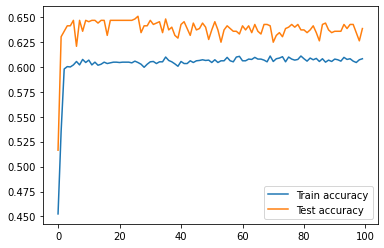

In [74]:
plot_acc(hist_rnn4)

CAN PROBABLY OPTIMIZE THIS MORE WILL COME BACK 

## LTSM 

In [76]:
Xs_train.shape

(2920, 10)

In [77]:
# make df? 
X_train_lstm= np.reshape(Xs_train,(Xs_train.shape[0],1,Xs_train.shape[1]))
X_test_lstm = np.reshape(Xs_test,(Xs_test.shape[0],1,Xs_test.shape[1]))

In [78]:
X_train_lstm.shape

(2920, 1, 10)

In [79]:
X_test_lstm.shape

(731, 1, 10)

In [83]:
# model network 

lstm = Sequential()
lstm.add(LSTM(40,input_shape=(1,10)))
lstm.add(Dense(30,activation='relu'))
lstm.add(Dense(3,))


# compile model 
lstm.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

lstm.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 40)                8160      
_________________________________________________________________
dense_20 (Dense)             (None, 30)                1230      
_________________________________________________________________
dense_21 (Dense)             (None, 3)                 93        
Total params: 9,483
Trainable params: 9,483
Non-trainable params: 0
_________________________________________________________________


In [84]:
# fit model 
hist_lstm = lstm.fit(X_train_lstm,y_train_nn,
                     validation_data=(X_test_lstm,y_test_nn),
                  epochs=100,verbose=2)

Epoch 1/100
92/92 - 3s - loss: 5.3566 - acc: 0.4473 - val_loss: 5.0536 - val_acc: 0.4350
Epoch 2/100
92/92 - 0s - loss: 5.3705 - acc: 0.4808 - val_loss: 5.5480 - val_acc: 0.5130
Epoch 3/100
92/92 - 0s - loss: 4.4679 - acc: 0.5599 - val_loss: 4.8588 - val_acc: 0.5882
Epoch 4/100
92/92 - 0s - loss: 6.2432 - acc: 0.5596 - val_loss: 4.2294 - val_acc: 0.5650
Epoch 5/100
92/92 - 0s - loss: 4.8693 - acc: 0.5647 - val_loss: 4.7048 - val_acc: 0.6320
Epoch 6/100
92/92 - 0s - loss: 5.2166 - acc: 0.5767 - val_loss: 4.1300 - val_acc: 0.6347
Epoch 7/100
92/92 - 0s - loss: 5.0232 - acc: 0.5788 - val_loss: 4.2178 - val_acc: 0.6334
Epoch 8/100
92/92 - 0s - loss: 5.0508 - acc: 0.5795 - val_loss: 4.3279 - val_acc: 0.6279
Epoch 9/100
92/92 - 0s - loss: 5.1115 - acc: 0.5788 - val_loss: 4.3718 - val_acc: 0.6265
Epoch 10/100
92/92 - 0s - loss: 5.1942 - acc: 0.5740 - val_loss: 4.4378 - val_acc: 0.6252
Epoch 11/100
92/92 - 0s - loss: 5.2108 - acc: 0.5747 - val_loss: 4.4378 - val_acc: 0.6252
Epoch 12/100
92/92 

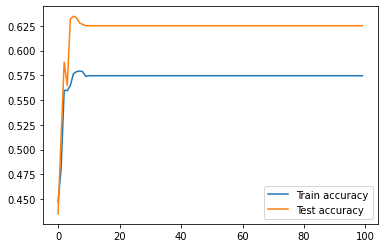

In [85]:
plot_acc(hist_lstm)

- Try more complex model 

### GridSearch  

In [88]:
# function to make models 
def model_func_lstm(nodes_lstm,nodes_dense):
    model = Sequential()
    model.add(LSTM(nodes_lstm,input_shape=(1,10)))
    model.add(Dense(nodes_dense,activation='relu'))
    model.add(Dense(3,activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
    return model 

In [89]:
# wrapper 
lstm_modeler = KerasClassifier(build_fn=model_func_lstm,epochs=50)


In [91]:
# params to search over 
params_lstm = {
    'nodes_lstm':[8,64,120,240],
    'nodes_dense':[8,64,120,240]
}

In [92]:
# instantiate grid search 
lstm_gs = GridSearchCV(lstm_modeler,params_lstm,cv=3,verbose=1)

In [93]:
# fit lstm_gs 
lstm_gs.fit(X_train_lstm,y_train_nn)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/50
61/61 [==============================] - 2s 5ms/step - loss: 1.0279 - acc: 0.5987
Epoch 2/50
61/61 [==============================] - 0s 5ms/step - loss: 0.9195 - acc: 0.6105
Epoch 3/50
61/61 [==============================] - 0s 5ms/step - loss: 0.7994 - acc: 0.6131
Epoch 4/50
61/61 [==============================] - 0s 5ms/step - loss: 0.7003 - acc: 0.6172
Epoch 5/50
61/61 [==============================] - 0s 5ms/step - loss: 0.6318 - acc: 0.6480
Epoch 6/50
61/61 [==============================] - 0s 5ms/step - loss: 0.5838 - acc: 0.6937
Epoch 7/50
61/61 [==============================] - 0s 5ms/step - loss: 0.5470 - acc: 0.7441
Epoch 8/50
61/61 [==============================] - 0s 5ms/step - loss: 0.5171 - acc: 0.7688
Epoch 9/50
61/61 [==============================] - 0s 5ms/step - loss: 0.4912 - acc: 0.7857
Epoch 10/50
61/61 [==============================] - 0s 5ms/step - loss: 0.4676 - acc: 0.7960
Epoch 11/50
61/61 [==============================] - 0s 5ms/step - lo

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 21.3min finished


Epoch 1/50
92/92 [==============================] - 2s 6ms/step - loss: 0.8874 - acc: 0.7154
Epoch 2/50
92/92 [==============================] - 1s 5ms/step - loss: 0.5212 - acc: 0.8031
Epoch 3/50
92/92 [==============================] - 0s 5ms/step - loss: 0.4072 - acc: 0.8154
Epoch 4/50
92/92 [==============================] - 0s 5ms/step - loss: 0.3803 - acc: 0.8281
Epoch 5/50
92/92 [==============================] - 0s 5ms/step - loss: 0.3714 - acc: 0.8295
Epoch 6/50
92/92 [==============================] - 0s 5ms/step - loss: 0.3656 - acc: 0.8312
Epoch 7/50
92/92 [==============================] - 0s 5ms/step - loss: 0.3622 - acc: 0.8223
Epoch 8/50
92/92 [==============================] - 0s 5ms/step - loss: 0.3578 - acc: 0.8305
Epoch 9/50
92/92 [==============================] - 0s 5ms/step - loss: 0.3559 - acc: 0.8305
Epoch 10/50
92/92 [==============================] - 0s 5ms/step - loss: 0.3531 - acc: 0.8288
Epoch 11/50
92/92 [==============================] - 0s 5ms/step - lo

GridSearchCV(cv=3, error_score=nan,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f7928c72a10>,
             iid='deprecated', n_jobs=None,
             param_grid={'nodes_dense': [8, 64, 120, 240],
                         'nodes_lstm': [8, 64, 120, 240]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [90]:
def gs_results(gs):
    return pd.DataFrame(gs.cv_results_)[['params','mean_test_score']].sort_values(by='mean_test_score',ascending=False)

In [94]:
gs_results(lstm_gs)

,params,mean_test_score
1,"{'nodes_dense': 8, 'nodes_lstm': 64}",0.826361
11,"{'nodes_dense': 120, 'nodes_lstm': 240}",0.826020
6,"{'nodes_dense': 64, 'nodes_lstm': 120}",0.824306
12,"{'nodes_dense': 240, 'nodes_lstm': 8}",0.823959
3,"{'nodes_dense': 8, 'nodes_lstm': 240}",0.821566
10,"{'nodes_dense': 120, 'nodes_lstm': 120}",0.820196
13,"{'nodes_dense': 240, 'nodes_lstm': 64}",0.819513
0,"{'nodes_dense': 8, 'nodes_lstm': 8}",0.819508
5,"{'nodes_dense': 64, 'nodes_lstm': 64}",0.819168
14,"{'nodes_dense': 240, 'nodes_lstm': 120}",0.818825


In [95]:
lstm_gs.best_params_

{'nodes_dense': 8, 'nodes_lstm': 64}

In [96]:
lstm_gs.score(X_train_lstm,y_train_nn)

92/92 [==============================] - 1s 4ms/step - loss: 0.3222 - acc: 0.8445


0.8445205688476562

In [97]:
lstm_gs.score(X_train_lstm,y_train_nn), lstm_gs.score(X_test_lstm,y_test_nn)

23/23 [==============================] - 0s 4ms/step - loss: 0.5048 - acc: 0.7948


(0.8445205688476562, 0.794801652431488)

### Randomized Search 

adding another dense layer 

In [99]:
from sklearn.model_selection import RandomizedSearchCV

In [100]:
from scipy.stats import randint

In [103]:
# function to make models 
def model_func_lstm2(nodes_lstm,nodes_dense1,nodes_dense2):
    model = Sequential()
    model.add(LSTM(nodes_lstm,input_shape=(1,10)))
    model.add(Dense(nodes_dense1,activation='relu'))
    model.add(Dense(nodes_dense2,activation='relu'))
    model.add(Dense(3,activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
    return model 

# wrapper 
lstm_modeler = KerasClassifier(build_fn=model_func_lstm2,epochs=50,verbose=0)


In [104]:
# params  
params_rs_lstm1 = {
    'nodes_lstm': randint(8,100),
    'nodes_dense1': randint(8,100),
    'nodes_dense2':randint(8,100)
}
#instantiate randomized search
rs_lstm_1 = RandomizedSearchCV(lstm_modeler,params_rs_lstm1,n_iter=50,random_state=42,verbose=2,cv=2)

# fit 
rs_lstm_1.fit(X_train_lstm,y_train_nn)

Fitting 2 folds for each of 50 candidates, totalling 100 fits
[CV] nodes_dense1=59, nodes_dense2=22, nodes_lstm=79 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. nodes_dense1=59, nodes_dense2=22, nodes_lstm=79, total=  12.6s
[CV] nodes_dense1=59, nodes_dense2=22, nodes_lstm=79 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.6s remaining:    0.0s


[CV] .. nodes_dense1=59, nodes_dense2=22, nodes_lstm=79, total=  12.2s
[CV] nodes_dense1=68, nodes_dense2=28, nodes_lstm=90 .................
[CV] .. nodes_dense1=68, nodes_dense2=28, nodes_lstm=90, total=  12.2s
[CV] nodes_dense1=68, nodes_dense2=28, nodes_lstm=90 .................
[CV] .. nodes_dense1=68, nodes_dense2=28, nodes_lstm=90, total=  12.8s
[CV] nodes_dense1=94, nodes_dense2=82, nodes_lstm=82 .................
[CV] .. nodes_dense1=94, nodes_dense2=82, nodes_lstm=82, total=  12.2s
[CV] nodes_dense1=94, nodes_dense2=82, nodes_lstm=82 .................
[CV] .. nodes_dense1=94, nodes_dense2=82, nodes_lstm=82, total=  12.1s
[CV] nodes_dense1=95, nodes_dense2=31, nodes_lstm=10 .................
[CV] .. nodes_dense1=95, nodes_dense2=31, nodes_lstm=10, total=  12.0s
[CV] nodes_dense1=95, nodes_dense2=31, nodes_lstm=10 .................
[CV] .. nodes_dense1=95, nodes_dense2=31, nodes_lstm=10, total=  13.1s
[CV] nodes_dense1=29, nodes_dense2=60, nodes_lstm=9 ..................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 20.8min finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f7928d3cbd0>,
                   iid='deprecated', n_iter=50, n_jobs=None,
                   param_distributions={'nodes_dense1': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f795027b510>,
                                        'nodes_dense2': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f79225a6150>,
                                        'nodes_lstm': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f795027bed0>},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [110]:
pd.set_option('max_colwidth',None)
print(rs_lstm_1.score(X_train_lstm,y_train_nn), rs_lstm_1.score(X_test_lstm,y_test_nn))
gs_results(rs_lstm_1).head(10)


0.8482876420021057 0.798905611038208


,params,mean_test_score
21,"{'nodes_dense1': 54, 'nodes_dense2': 42, 'nodes_lstm': 85}",0.817808
39,"{'nodes_dense1': 12, 'nodes_dense2': 48, 'nodes_lstm': 35}",0.815069
45,"{'nodes_dense1': 72, 'nodes_dense2': 54, 'nodes_lstm': 85}",0.815068
6,"{'nodes_dense1': 9, 'nodes_dense2': 71, 'nodes_lstm': 67}",0.814726
17,"{'nodes_dense1': 67, 'nodes_dense2': 21, 'nodes_lstm': 16}",0.813699
35,"{'nodes_dense1': 16, 'nodes_dense2': 95, 'nodes_lstm': 8}",0.813699
11,"{'nodes_dense1': 87, 'nodes_dense2': 22, 'nodes_lstm': 69}",0.813699
10,"{'nodes_dense1': 49, 'nodes_dense2': 99, 'nodes_lstm': 67}",0.813699
36,"{'nodes_dense1': 15, 'nodes_dense2': 95, 'nodes_lstm': 70}",0.813356
22,"{'nodes_dense1': 88, 'nodes_dense2': 43, 'nodes_lstm': 57}",0.813356


In [ ]:
rs_lstm_1.best_params_

In [106]:
print(rs_lstm_1.score(X_train_lstm,y_train_nn), rs_lstm_1.score(X_test_lstm,y_test_nn))


0.8482876420021057 0.798905611038208


### 3 dense layers 


In [112]:
def model_func_lstm_3(nodes_lstm,nodes_dense_1,nodes_dense_2,nodes_dense_3):
    model = Sequential()
    model.add(LSTM(nodes_lstm,input_shape=(1,10)))
    model.add(Dense(nodes_dense_1,activation='relu'))
    model.add(Dense(nodes_dense_2,activation='relu'))
    model.add(Dense(nodes_dense_3,activation='relu'))
    model.add(Dense(3,activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
    return model 

# wrapper 
lstm_modeler3 = KerasClassifier(build_fn=model_func_lstm_3,epochs=50,verbose=0)

In [114]:
# params to search over 
params_rs_lstm_3 = {
    'nodes_lstm':randint(8,100),
    'nodes_dense_1':randint(8,100),
    'nodes_dense_2': randint(8,100),
    'nodes_dense_3': randint(8,100),
}

# instantiate grid search 
lstm_rs_3 = RandomizedSearchCV(lstm_modeler3,params_rs_lstm_3,cv=2,verbose=1,n_iter=25,random_state=42,)

# fit 
lstm_rs_3.fit(X_train_lstm,y_train_nn)

Fitting 2 folds for each of 25 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 10.8min finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f7924cae250>,
                   iid='deprecated', n_iter=25, n_jobs=None,
                   param_distributions={'nodes_dense_1': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f795009df90>,
                                        'nodes_dense_2': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f795009dc50>,
                                        'nodes_dense_3': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f7951ae6cd0>,
                                        'nodes_lstm': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f795009db10>},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=1)

In [115]:
pd.set_option('max_colwidth',None)
print(lstm_rs_3.score(X_train_lstm,y_train_nn), lstm_rs_3.score(X_test_lstm,y_test_nn))
gs_results(lstm_rs_3)


0.8431506752967834 0.798905611038208


,params,mean_test_score
12,"{'nodes_dense_1': 25, 'nodes_dense_2': 11, 'nodes_dense_3': 96, 'nodes_lstm': 67}",0.817808
17,"{'nodes_dense_1': 57, 'nodes_dense_2': 11, 'nodes_dense_3': 9, 'nodes_lstm': 13}",0.816096
19,"{'nodes_dense_1': 25, 'nodes_dense_2': 97, 'nodes_dense_3': 51, 'nodes_lstm': 41}",0.815411
10,"{'nodes_dense_1': 62, 'nodes_dense_2': 71, 'nodes_dense_3': 10, 'nodes_lstm': 58}",0.814726
11,"{'nodes_dense_1': 14, 'nodes_dense_2': 28, 'nodes_dense_3': 80, 'nodes_lstm': 46}",0.813699
4,"{'nodes_dense_1': 37, 'nodes_dense_2': 45, 'nodes_dense_3': 9, 'nodes_lstm': 71}",0.813356
20,"{'nodes_dense_1': 81, 'nodes_dense_2': 69, 'nodes_dense_3': 21, 'nodes_lstm': 55}",0.812671
24,"{'nodes_dense_1': 96, 'nodes_dense_2': 67, 'nodes_dense_3': 48, 'nodes_lstm': 36}",0.811986
7,"{'nodes_dense_1': 98, 'nodes_dense_2': 66, 'nodes_dense_3': 49, 'nodes_lstm': 99}",0.811644
3,"{'nodes_dense_1': 29, 'nodes_dense_2': 60, 'nodes_dense_3': 9, 'nodes_lstm': 95}",0.811301


## BaysianSearch 

https://medium.com/geekculture/10-hyperparameters-to-keep-an-eye-on-for-your-lstm-model-and-other-tips-f0ff5b63fcd4

In [ ]:
search_space_lstm = {
    'nodes_lstm':Integer(16,100),
    'nodes_dense':Integer(16,100)
}


In [ ]:
lstm_bs1 = BayesSearchCV(lstm_modeler,search_space_lstm,n_iter=50,random_state=42,)

In [ ]:
# pip install scikit-learn==0.23.2
# https://github.com/scikit-optimize/scikit-optimize/issues/978
# https://towardsdatascience.com/hyperparameter-optimization-with-scikit-learn-scikit-opt-and-keras-f13367f3e796

In [ ]:
lstm_bs1.fit(X_train_lstm,y_train_nn)

In [ ]:
lstm_bs1.best_params_

In [ ]:
def bs_results(bs):
    return pd.DataFrame(bs.cv_results_)[['params','mean_test_score']].sort_values(by='mean_test_score',ascending=False)

In [ ]:
bs_results(lstm_bs1)

### 2nd BS 

## OTHER MODELS? 

# Predictions 

- fit best model 
- get predictions 
- measure success? 